# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [2]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl'}
           

Load up files into a Samuels Viewer

In [3]:
fnonl=Sam.Viewer(filenames['fnonl'],colors=['r'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 219407
(ZC [Grammatical Item],52409) : [('the', 13843), ('and', 5886), ('a', 4064), ('in', 3748), ('of', 3743), ('to', 3721), ('on', 1677), ('at', 1536), ('with', 1233), ('had', 1166)]
(NULL,29902) : [(',', 13389), ('.', 9084), (';', 6341), ('-', 390), (':', 264), ('"', 78), (')', 75), ('(', 74), ('?', 50), ('!', 29)]
(ZF [Pronoun],28680) : [('i', 11051), ('he', 3310), ('it', 2704), ('she', 2520), ('me', 2151), ('him', 1636), ('her', 1332), ('them', 1040), ('they', 695), ('that', 493)]
(AK.01.g [State/condition],7719) : [('was', 3778), ('is', 1089), ('am', 987), ('were', 763), ('been', 351), ('be', 275), ('are', 238), ("'s", 107), ('being', 67), ('way', 53)]
(AP.04 [Number],5194) : [('two', 653), ('one', 446), ('three', 397), ('four', 260), ('five', 256), ('ten', 219), ('last', 212), ('next', 211), ('six', 199), ('eight', 170)]
(AW.01 [Owning],4737) : [('my', 2898), ('her', 712), ('his', 704), ('our', 143), ('own', 119), ('belonged', 38), ('their', 30), ('landlord', 2

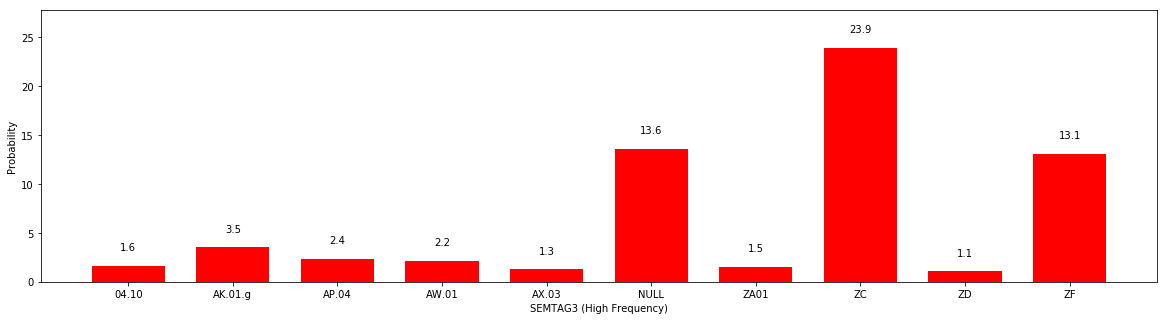

In [4]:
fnonl_tagbag=fnonl.make_bow(field='SEMTAG3',cutoff=10,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [35]:
print(fnonl.find_tags('woman',field='SEMTAG3'))
print(fnonl.find_tags('women',field='SEMTAG3'))

[('AD.03.b [Woman]', 287), ('AY.06.b [The common people]', 3), ('AY.01.g.01 [Married woman]', 3), ('BB.09.b.01 [Servant]', 1)]
[('AD.03.b [Woman]', 26)]


In [36]:
print(fnonl.find_tags('man',field='SEMTAG3'))
print(fnonl.find_tags('men',field='SEMTAG3'))

[('AD.03.a [Man]', 534), ('AD.03.h.01 [Old man]', 2)]
[('AD.03.a [Man]', 57)]


In [37]:
print(fnonl.find_tags('child'))
print(fnonl.find_tags('children'))

[('AD.03.d [Child]', 132), ('AY.01.e.02 [Child]', 11), ('ZA01 [Personal Name]', 1)]
[('AD.03.d [Child]', 64), ('AY.01.e.02 [Child]', 6)]


In [38]:
print(fnonl.find_text('AD.03.b'))

[('woman', 287), ('women', 26), ('sister', 3), ('piece', 2), ('wife', 1), ('petticoat', 1)]


In [40]:
print(fnonl.find_text('AD.03.a'))

[('man', 534), ('men', 57), ('gentleman', 7), ('piece', 4), ('horse', 2), ('boy', 2), ('horses', 1), ('boys', 1), ('a', 1)]


In [41]:
print(fnonl.find_text('AD.03.d'))

[('child', 132), ('children', 64), ('small', 10)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

(_det:ZC [Grammatical Item],0.8551005873384403) : [('a', 119), ('the', 93), ('this', 33), ('an', 7)]
(attr:AK.01.g [State/condition],0.27733969794468816) : [('am', 35), ('is', 15), ('was', 10), ('be', 1), ('are', 1)]
(_amod:AF.05 [Plants defined by age/cycles],0.24820254941301248) : [('young', 27), ('younger', 1)]
(_det:ZZ [Unrecognised],0.20762237671956116) : [('another', 25)]
(_amod:AP.02.b [Individual character/quality],0.16343526149249077) : [('single', 19)]
(_amod:AW.04 [Poverty],0.1256739993201325) : [('poor', 12)]
(_compound:BF.23.f.02 [Lay functionaries],0.06724703445203073) : [('widow', 6)]
(dobj:AI.14.b [Seeing/looking],0.05686313880324892) : [('saw', 15), ('see', 1)]
(ROOT:AD.03.b [Woman],0.056039195376692275) : [('woman', 5)]
(_ROOT:AD.03.b [Woman],0.056039195376692275) : [('woman', 5)]
(pobj:ZC [Grammatical Item],0.054617791626010756) : [('with', 20), ('to', 15), ('of', 8), ('for', 6), ('by', 5), ('from', 4), ('at', 1), ('as', 1)]
(_det:ZF [Pronoun],0.051353093314293136) :

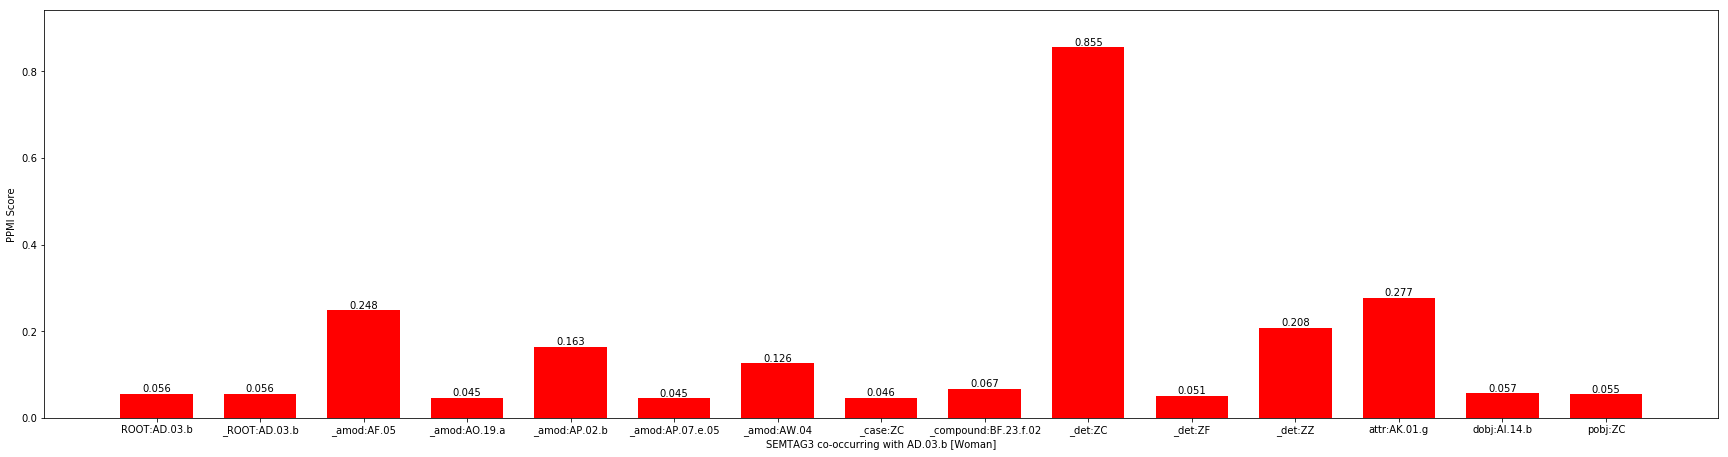

In [7]:
woman=fnonl.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8413218339649193)
(_amod, 0.46157737190559717)
(attr, 0.22871940235902447)
(nsubj, 0.10909718358435545)
(_relcl, 0.09641608758415425)
(pobj, 0.04208351666946858)
(dobj, 0.04084590301387784)
(_case, 0.040449404538828)
(_nummod, 0.01767094494386553)
(_compound, 0.01205857671937562)
(poss, 0.004651447808647764)
(_appos, 0.00442511730576303)
(_predet, 0.004388378277456284)
(_acl, 0.004356004258394806)
(parataxis, 0.000518639224088199)


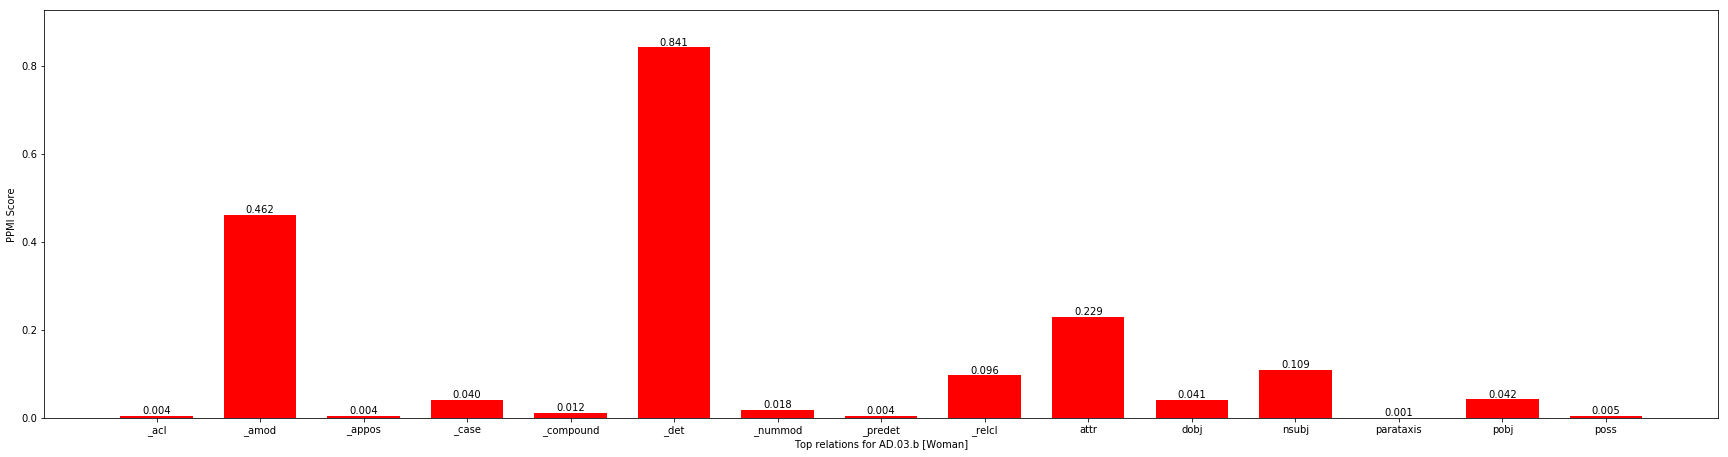

In [42]:
r=fnonl.get_top_relations('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8739208314508907)
(attr, 0.32705074847250826)
(_amod, 0.28456589676517563)
(_relcl, 0.15965408738632994)
(nsubj, 0.1361764060056821)
(_acl, 0.03788760602477434)
(dobj, 0.03322109589751954)
(_nummod, 0.03282858576414719)
(_case, 0.02294687566560649)
(_appos, 0.009387210046738474)
(nsubjpass, 0.005568280925631214)
(appos, 0.005145071716846377)
(_predet, 0.0001068111695341552)
(dep, 4.266928737954464e-05)


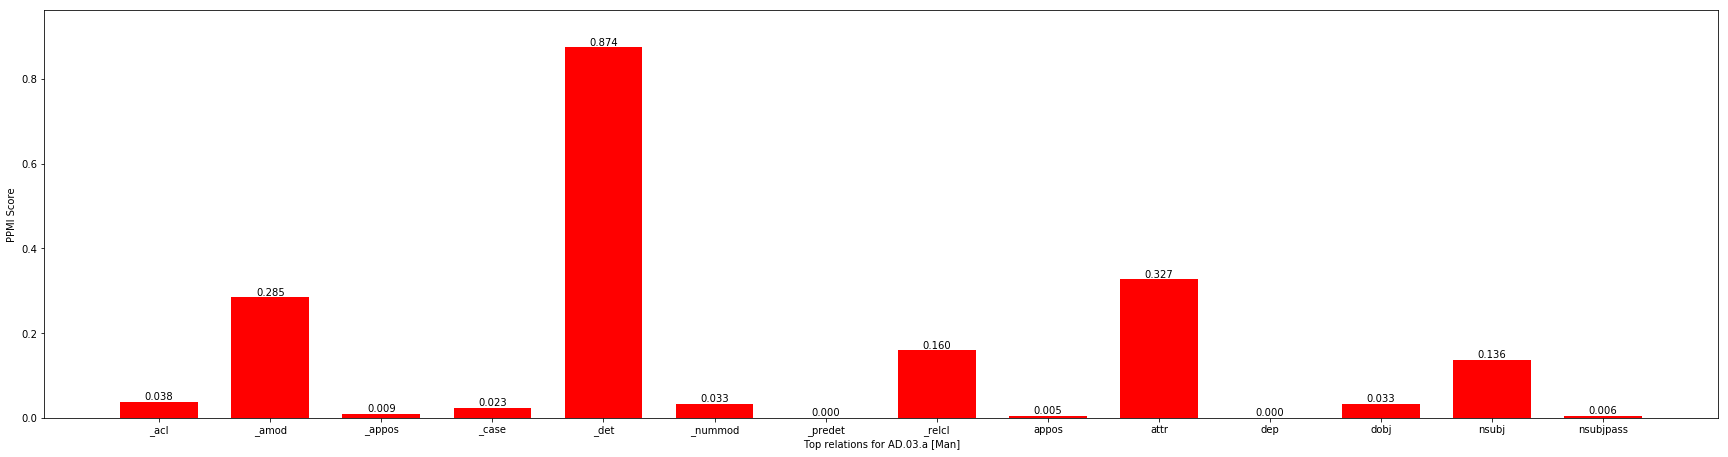

In [43]:
mr=fnonl.get_top_relations('AD.03.a',displaygraph=True,cutoff=15)

(_det, 0.6675392209306834)
(dobj, 0.42515749512947076)
(_poss, 0.3703812200752128)
(_case, 0.3381834014861698)
(_nummod, 0.2517373921374463)
(poss, 0.1599168734901646)
(pobj, 0.1281004860909143)
(_amod, 0.11353222330933559)
(amod, 0.04558143314177003)
(nsubj, 0.03213799835059403)
(_relcl, 0.02022453606717455)
(_appos, 0.0155058425912796)
(nsubjpass, 0.00882209369546784)


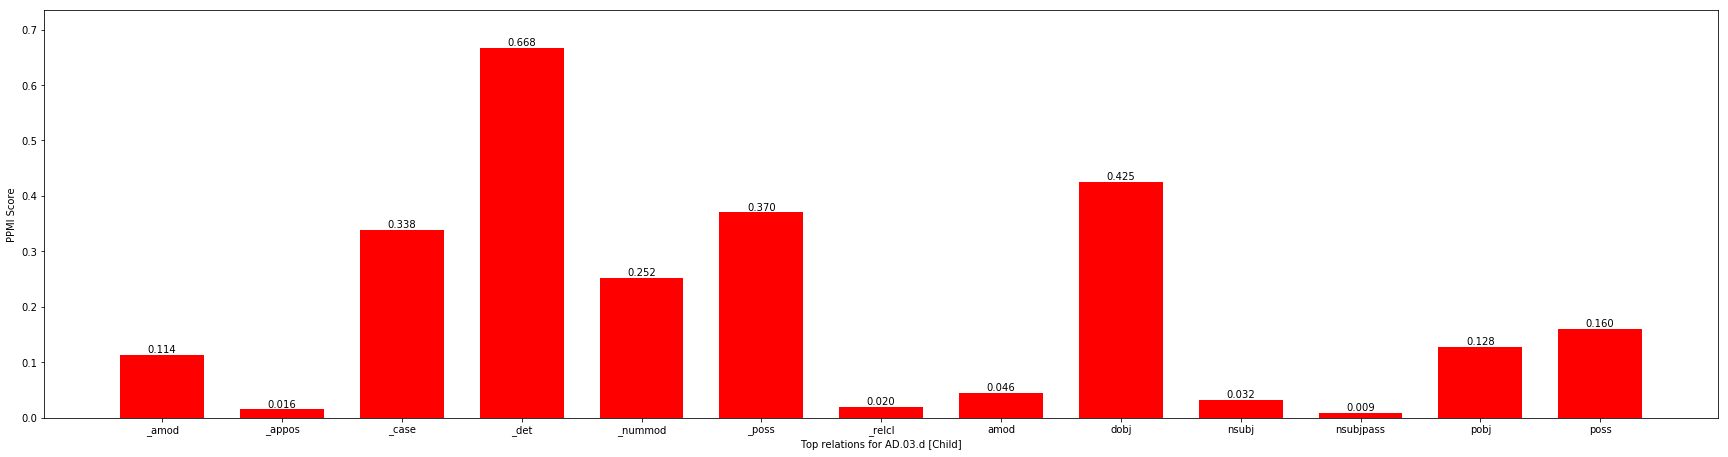

In [44]:
cr=fnonl.get_top_relations('AD.03.d',displaygraph=True,cutoff=15)

(AF.05 [Plants defined by age/cycles],0.722581893979547) : [('young', 27), ('younger', 1)]
(AP.02.b [Individual character/quality],0.4546924943649831) : [('single', 19)]
(AW.04 [Poverty],0.4475576426714771) : [('poor', 12)]
(AP.07.e.05 [Fact/action of being joined/joining],0.17018787245321604) : [('married', 4)]
(AO.19.a [Calamity/misfortune],0.13742477379007914) : [('unfortunate', 5)]
(BD.04.e.02 [Innocence],0.08509393622660802) : [('innocent', 2)]
(AM.08.c.03 [Oldness/ancientness],0.061110863562303615) : [('old', 5)]
(BD.04.e.01.a [Modesty/decency],0.04254696811330401) : [('decent', 1)]
(AR.18.b [Prudence, discretion],0.04254696811330401) : [('prudent', 1)]
(AS.14.c [Disapproval, censure],0.04254696811330401) : [('shocking', 1)]


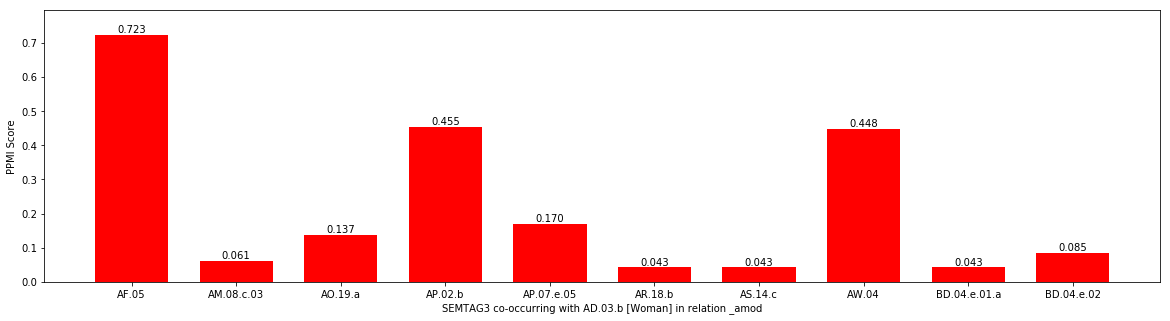

In [10]:
w=fnonl.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

(AF.05 [Plants defined by age/cycles],0.9781002022727235) : [('young', 54)]
(AP.01.f [Difference],0.083073556012818) : [('other', 17), ('different', 1)]
(AB.03 [Age],0.08139168687251119) : [('elderly', 5)]
(BD.04.d [Probity/honesty/uprightness],0.07951593094374106) : [('respectable', 2), ('honest', 2)]
(AG.01.ak.02.a [Excess in drinking],0.062343916290194326) : [('drunken', 3)]
(BI.09 [Worker],0.062343916290194326) : [('day-labouring', 2), ('working', 1)]
(AP.01.d [Identity],0.05852108489302418) : [('same', 14)]
(AB.17.c [Bodily height],0.053025247433899414) : [('tall', 3)]
(AP.06.c.01 [Addition/supplementation],0.053025247433899414) : [('other', 3)]
(AJ.09.e.02 [Black/blackness],0.03723894131457668) : [('black', 5)]


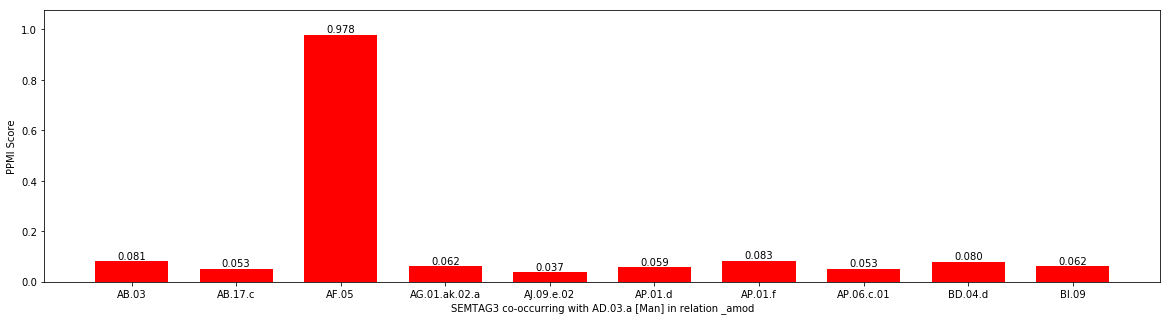

In [11]:
m=fnonl.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

(AD.03.d [Child],0.8247355354361358) : [('small', 5)]
(AY.01.e.02 [Child],0.4948413212616815) : [('fatherless', 3)]
(AM.08.c.03 [Oldness/ancientness],0.25322544067061264) : [('old', 3)]
(AF.05 [Plants defined by age/cycles],0.08831920341117282) : [('youngest', 2)]
(AL.02.d.02 [Smallness],0.052299435335129804) : [('small', 1)]
(AS.11.a [Unimportance, triviality],0.01687385345676106) : [('little', 1)]


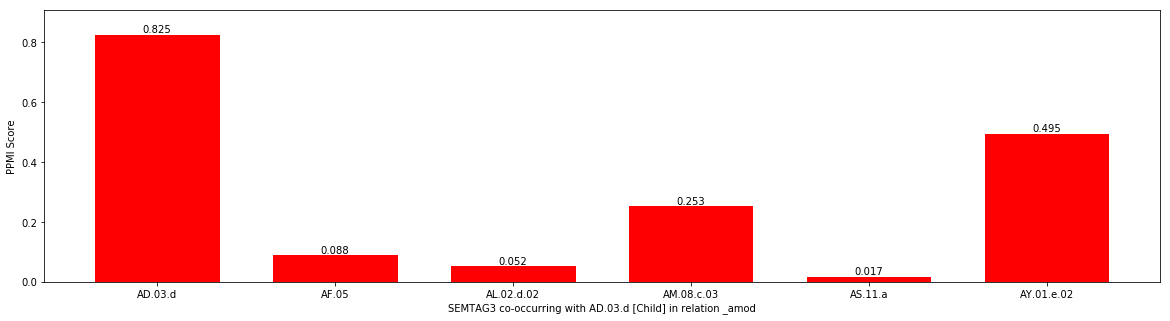

In [12]:
c=fnonl.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

(AI.14.b [Seeing/looking],0.8401058472531342) : [('saw', 15), ('see', 1)]
(AN.05.l.01 [Meeting/encounter],0.2632830788372696) : [('met', 3)]
(AW.16.c [Robbery, piracy, raiding],0.17097408617896176) : [('robbed', 1), ('rob', 1)]
(BE.01 [Upbringing],0.16825123351577612) : [('nursing', 1)]
(AO.22.b [Customary/habitual mode of behaviour],0.15759137644904395) : [('using', 1)]
(AL.05.w.02 [Action/fact of sitting],0.14932294893772866) : [('sat', 1)]
(AI.14.h.03 [Appearance/aspect],0.13685520661809902) : [('seeming', 1)]
(AK.04 [Present events],0.13190729468473486) : [('came', 1)]
(AR.08 [Thinking, thought],0.13190729468473486) : [('thought', 1)]
(AV.02.b [Desire],0.12950174651707197) : [('desired', 2)]


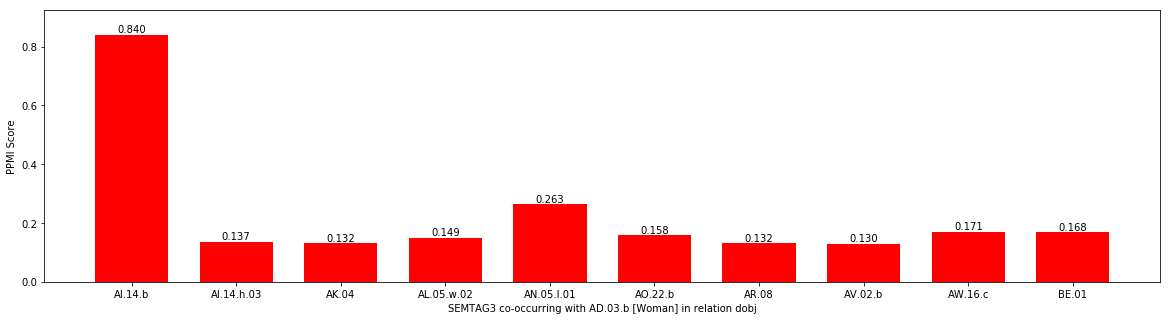

In [46]:
w=fnonl.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

(AI.14.b [Seeing/looking],0.7222396366851692) : [('saw', 16), ('seen', 4)]
(AN.05.l.01 [Meeting/encounter],0.3887132382863753) : [('met', 5)]
(AP.01.i [Similarity],0.3136979564868466) : [('resembles', 1), ('resembled', 1)]
(AR.36 [Knowledge],0.24363335011659754) : [('knew', 3), ('knowing', 2), ('known', 1), ('had', 1)]
(AL.01.b [Nearness],0.21516804672091244) : [('met', 2)]
(BK.06.g.03 [Narrative/story],0.13615163470268973) : [('told', 6)]
(AR.42.h [Dissimulation, pretence],0.11639875220211976) : [('came', 1)]
(AN.06 [Transference],0.11086367584257137) : [('sent', 2), ('send', 1), ('fetch', 1), ('brought', 1)]
(AR.16 [Understanding],0.10204288087364809) : [('told', 1), ('saw', 1)]
(AM.08.d.01 [Succession/following in time],0.10014995050679881) : [('followed', 1), ('follow', 1)]


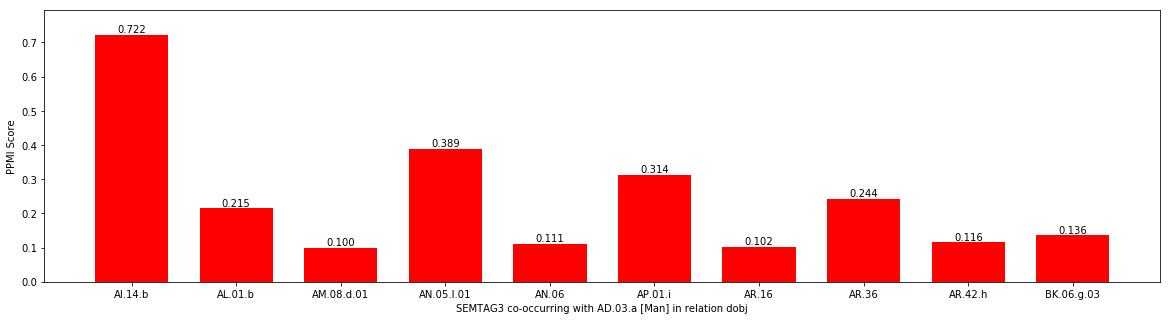

In [47]:
m=fnonl.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

(AR.01 [Mental capacity],0.914633681685396) : [('have', 9), ('had', 7), ('has', 1)]
(AG.01.s [Providing/receiving food],0.1456985850159163) : [('feed', 1)]
(AW.14 [Offering],0.14229745181103223) : [('had', 2)]
(AW.15 [Taking],0.14151033058517712) : [('took', 5), ('take', 2), ('taken', 1)]
(BE.01 [Upbringing],0.13284339884707363) : [('nursed', 1)]
(AN.05.m [Going away],0.12023334655077228) : [('left', 4)]
(AR.36 [Knowledge],0.0876295945752169) : [('have', 2), ('know', 1), ('had', 1)]
(AW.06.b [Receiving],0.08480263592876552) : [('received', 1), ('got', 1)]
(AL.05.i [Support],0.08400391207435878) : [('support', 1)]
(AN.06 [Transference],0.08261880311722514) : [('sent', 2), ('send', 1), ('brought', 1)]


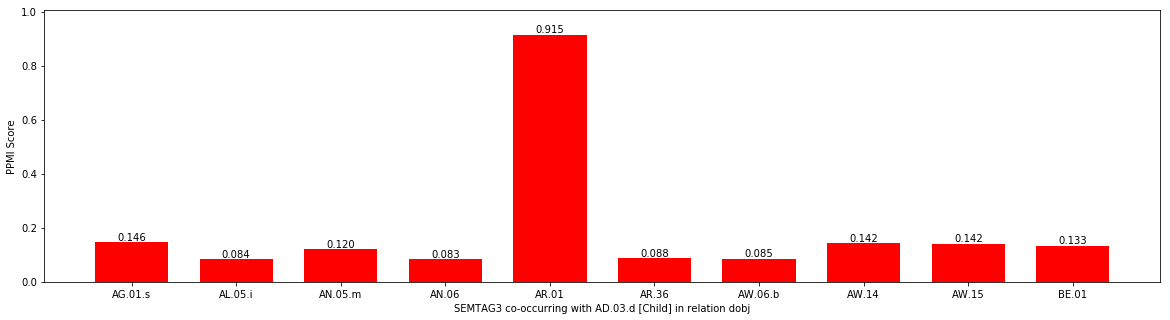

In [48]:
c=fnonl.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

(AX.12 [Requesting],0.46779930121607766) : [('asked', 8)]
(AA.11.i.01 [Rain],0.39093244924327697) : [('came', 3), ('come', 1)]
(BK.06.g.03 [Narrative/story],0.3077079417232078) : [('told', 6)]
(AW.11 [Giving],0.24736235809304696) : [('gave', 7)]
(BA.05 [Attack],0.22322136709932655) : [('pressed', 1)]
(AJ.05.h.06 [Action/process of dripping/falling in drops],0.2155468972650372) : [('dropped', 1), ('drop', 1)]
(AN.05.l [Movement towards a thing/person/position],0.2063415277345474) : [('came', 3), ('come', 1)]
(AD.03.f [Adult],0.19497697126000124) : [('running', 1)]
(AW.20 [Supply],0.18128186536945423) : [('keeps', 3)]
(AN.05.d [Forward movement],0.17845505883847126) : [('came', 1)]


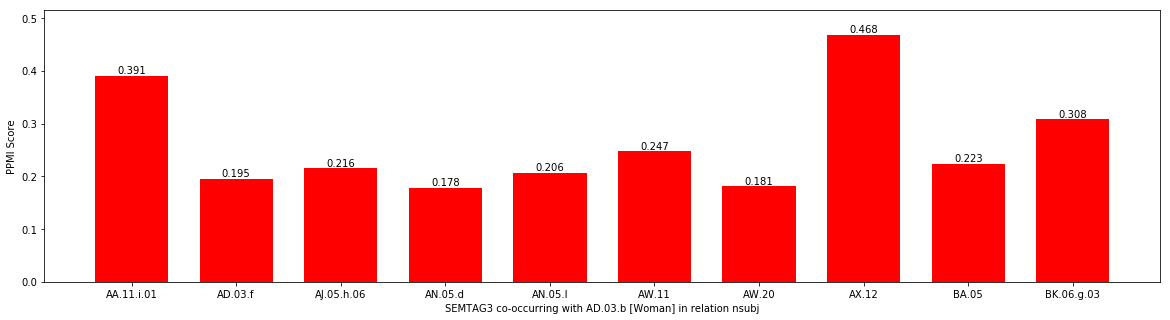

In [49]:
w=fnonl.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

(AK.01 [Existence],0.7386473068013916) : [('came', 16)]
(AG.03 [Acquisition of animals for food, hunting],0.22559647192827456) : [('ran', 2), ('run', 1), ('beating', 1)]
(AN.04.a.01 [Going swiftly on foot],0.2243479455776185) : [('run', 3), ('ran', 2), ('running', 1)]
(AI [Physical sensation],0.22163515459025807) : [('came', 7)]
(AN.05.l [Movement towards a thing/person/position],0.20278710991791868) : [('came', 8)]
(AW.15 [Taking],0.1951179012646777) : [('taken', 5), ('took', 4), ('take', 2), ('had', 1)]
(AO.09 [Ceasing],0.168358126415522) : [('stopped', 4)]
(AL.05.r [Opposite position],0.1506307244832261) : [('opposite', 1), ('answered', 1)]
(AI.08.a [Sleep],0.14564079073219224) : [('slept', 3), ('going', 1)]
(AA.11.i.01 [Rain],0.13767534529845976) : [('come', 3), ('came', 1)]


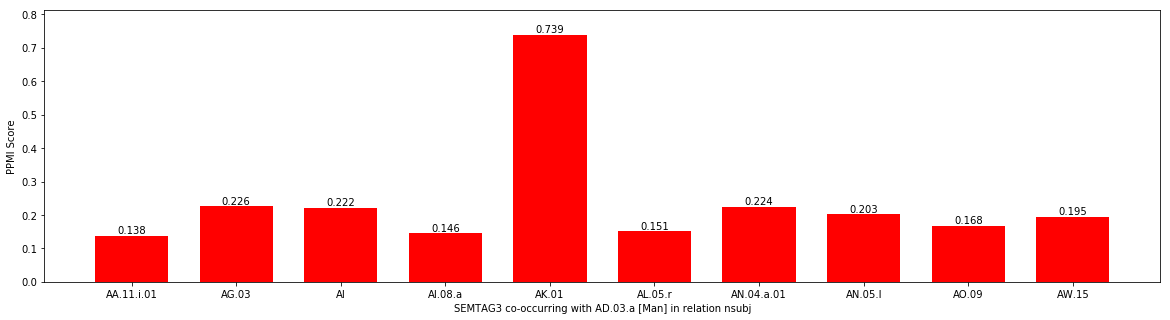

In [51]:
m=fnonl.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

(AK.01.g [State/condition],0.5496667776140682) : [('was', 11), ('were', 2)]
(BF.24.h.01 [Baptism],0.4515223692058749) : [('baptized', 1)]
(AK.01.e [Intrinsicality/inherence],0.32814861061281186) : [('belonged', 1)]
(AI.15.d.04.a [Cry of emotion/pain],0.32814861061281186) : [('screamed', 1)]
(BG.03.b [Role-playing],0.30022982172135504) : [('come', 1)]
(AN.05.l [Movement towards a thing/person/position],0.2275275200114089) : [('came', 2)]
(AO.11.b [Searching/seeking],0.17814313248410474) : [('searched', 1)]
(AX.12 [Requesting],0.15535645943364104) : [('crying', 1), ('cried', 1)]
(04.10 [],0.15065876904446815) : [('baptised', 1)]
(AI.08.a [Sleep],0.15065876904446815) : [('asleep', 1)]


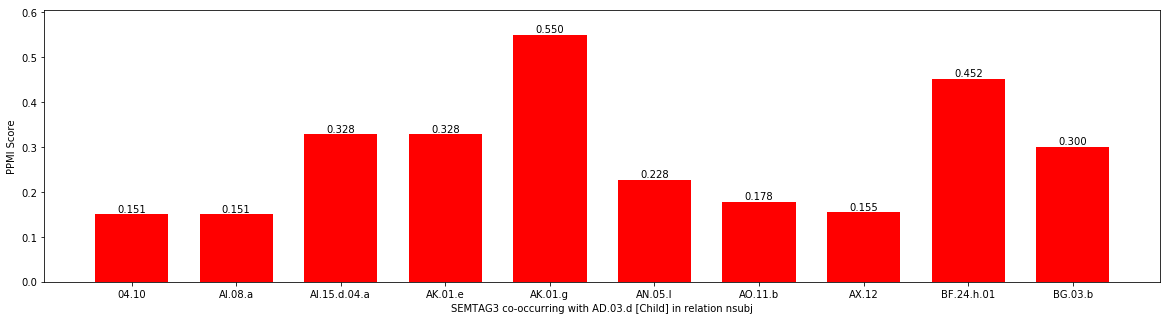

In [53]:
c=fnonl.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

(AO.02.b [Activity/occupation],1.0) : [('taken', 1)]


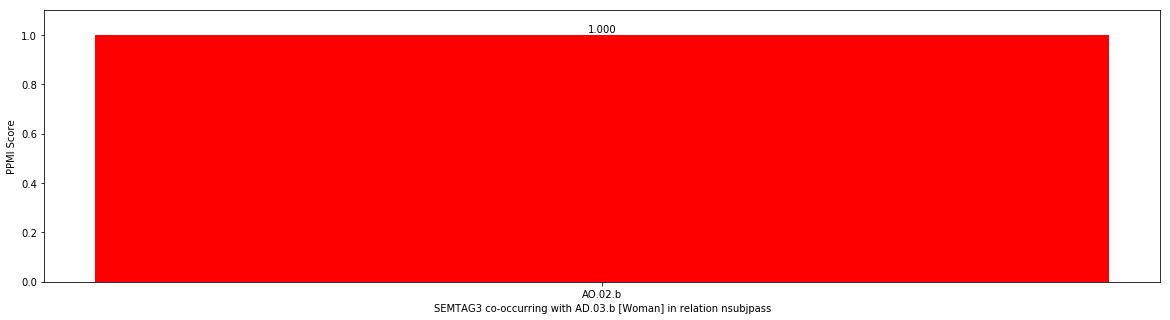

In [54]:
w=fnonl.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

(AN.03 [Progressive motion],0.7155591454962357) : [('gone', 2)]
(AS.01 [Attention],0.39170845303495494) : [('engaged', 1)]
(BI.08 [Lack of work],0.37368095391410044) : [('discharged', 1)]
(AN.06 [Transference],0.27505800647606876) : [('brought', 2)]
(AF.10 [Part of plant],0.23110782348822007) : [('taken', 1)]
(AW.16.c [Robbery, piracy, raiding],0.18652331341372913) : [('robbed', 1)]
(AA.11.a [Fine weather],0.17062193224774647) : [('taken', 1)]
(AX.03 [Speech],0.043950182987848696) : [('gone', 1)]


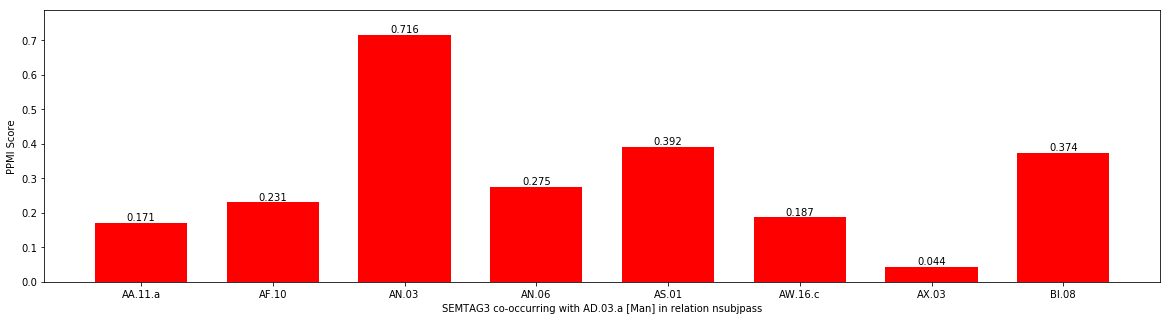

In [55]:
m=fnonl.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

(AN.06 [Transference],0.7644630601538523) : [('brought', 2)]
(BJ.01.j [Selling],0.6446675342067472) : [('exposed', 1)]


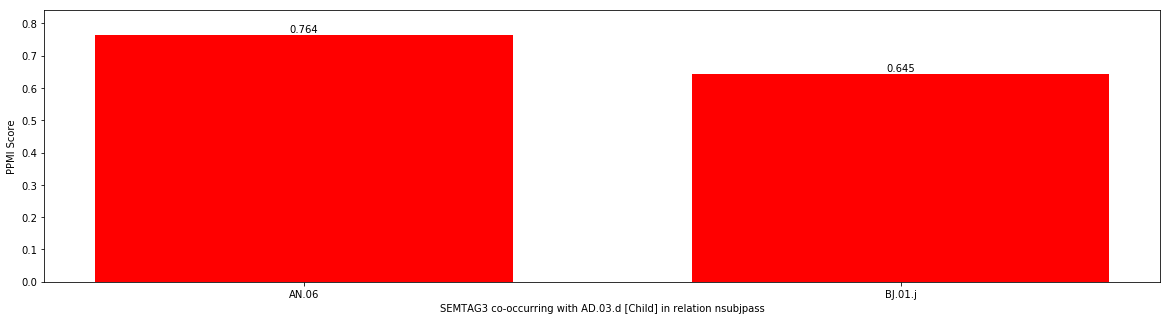

In [56]:
c=fnonl.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)

(ZZ [Unrecognised],0.9908522510620816) : [('another', 25)]
(ZF [Pronoun],0.1349511636304245) : [('that', 10)]


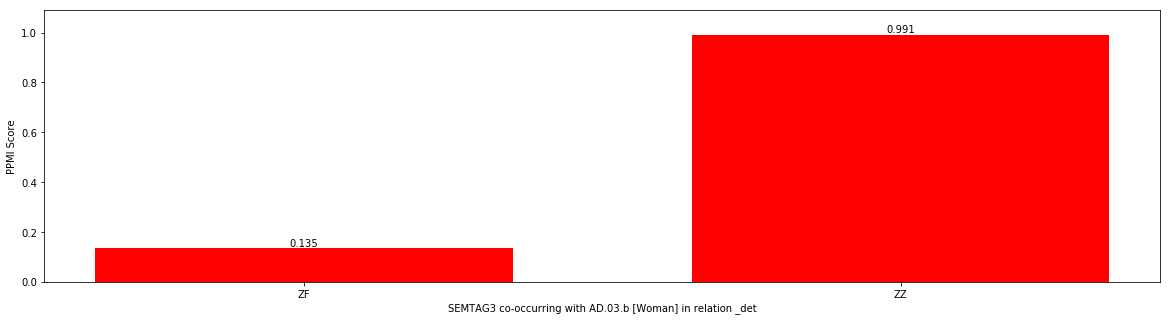

In [57]:
w=fnonl.get_top_features('AD.03.b',rel='_det',displaygraph=True)

(ZZ [Unrecognised],0.9462229834572418) : [('another', 25)]
(ZF [Pronoun],0.3187810628687498) : [('that', 19)]
(AD.03.a [Man],0.05514253833064594) : [('a', 1)]


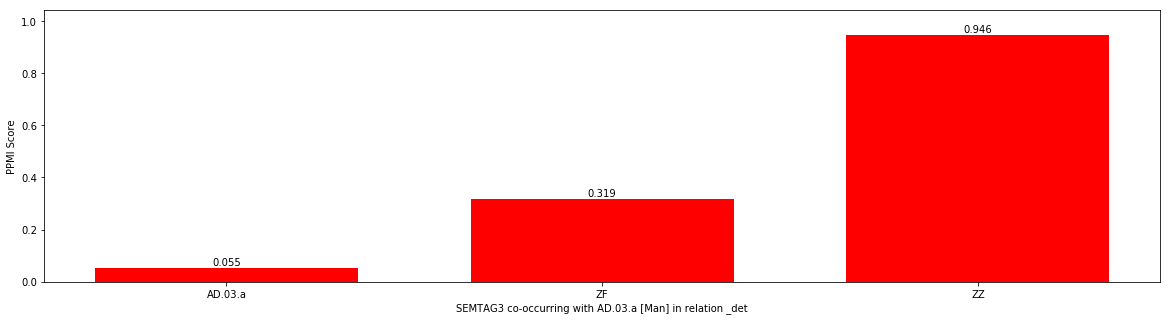

In [58]:
m=fnonl.get_top_features('AD.03.a',rel='_det',displaygraph=True)

(ZC [Grammatical Item],1.0) : [('the', 79), ('a', 22), ('this', 5)]


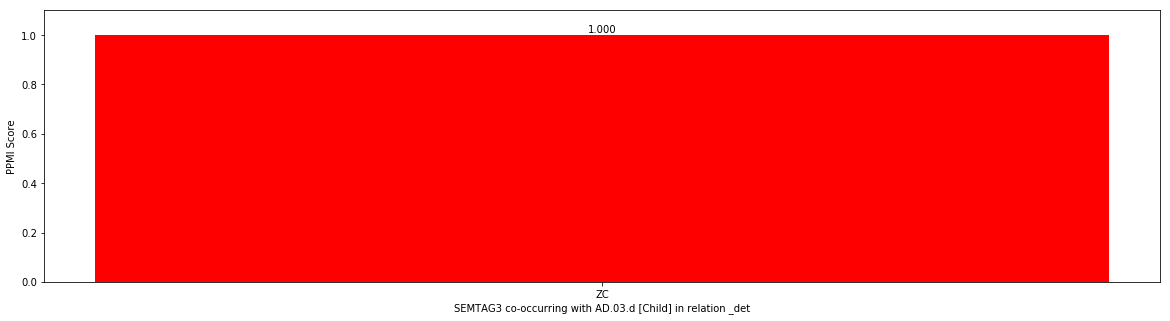

In [59]:
c=fnonl.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [60]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(fnonl.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(fnonl.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(fnonl.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9465544873130266
MAN-CHILD: 0.6514560125676631
WOMAN-CHILD: 0.6422025294919464
-----
_amod
WOMAN-MAN: 0.7123501118408654
MAN-CHILD: 0.08638503072103394
WOMAN-CHILD: 0.07929268263093614
-----
dobj
WOMAN-MAN: 0.7255088702804697
MAN-CHILD: 0.06944474830281104
WOMAN-CHILD: 0.0600914623704602
-----
nsubj
WOMAN-MAN: 0.239535156168611
MAN-CHILD: 0.09124014686958648
WOMAN-CHILD: 0.14786019779176376
-----
_det
WOMAN-MAN: 0.9805870485427681
MAN-CHILD: 0.0
WOMAN-CHILD: 0.0
-----
nsubjpass
WOMAN-MAN: 0.0
MAN-CHILD: 0.21027168535051366
WOMAN-CHILD: 0.0
-----


# Finding Nearest Neighbours


In [61]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(fnonl.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 0.9999999999999992), ('AD.03.a [Man]', 0.9465544873130266), ('BB.12.e.02 [Prisoner]', 0.855084552344831), ('BA.14.k.08.a [Officer/soldier of rank]', 0.8410562259862816), ('BC.07.b [Law-enforcement/peace-officer]', 0.8332866979486854), ('BB.09.e.01.a [Confinement]', 0.828225953797259), ('AY.06.a.03.a [Title/form of address for persons of rank]', 0.8230774022922773), ('AI.16.d [Clearing of refuse matter]', 0.8150530600468973), ('AB.11 [Taxonomy]', 0.7983490766561204), ('BI.11.r.01 [Fastenings]', 0.796953856316923)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999998), ('BE.04 [Member of university]', 0.7563030150760166), ('AD.03.c.02 [Young woman]', 0.722581893979547), ('AU.29.a [Love-affair]', 0.722581893979547), ('AG.03 [Acquisition of animals for food, hunting]', 0.722581893979547), ('AD.03.a [Man]', 0.7123501118408654), ('AU.29.b [A lover]', 0.590643337234967), ('BB [Authority]', 0.5361165315389845), ('AY.01.e.05

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [24]:
test={'fnonl':'f_nonl','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 219407
Size of corpus is 1302410
118 significantly characterising terms
Number of characteristic tags is 118
(AY.01.g.02 [Married man], 1331.5348625452032) : [('husband', 518), ('husbands', 5)]
(AZ.06.f.02.f [Room], 298.0152017216491) : [('room', 616), ('cellar', 23), ('garret', 10), ('rooms', 7), ('bedroom', 6), ('scullery', 4), ('closet', 4), ('back-parlour', 4), ('sitting-room', 3), ('loft', 3)]
(BF.25.j [Vestments], 269.97472034528187) : [('gown', 165), ('apron', 98), ('gowns', 57), ('aprons', 11), ('shovels', 3), ('shovel', 1)]
(AK.01 [Existence], 239.48993713865343) : [('things', 513), ('thing', 176), ('came', 176), ('in', 140), ('up', 56), ('come', 20), ('unborn', 2), ('ware', 1), ('is', 1), ('existence', 1)]
(AY.01.g.01 [Married woman], 230.99585901972938) : [('wife', 333), ('woman', 3), ("ma'am", 3)]
(AZ.06.f.02.h [Stairs], 226.160270676862) : [('stairs', 375), ('landing', 3), ('staircase', 2), ('stair-foot', 1), ('stair', 1), ('landing-place', 1)]
(AY.01.e.0

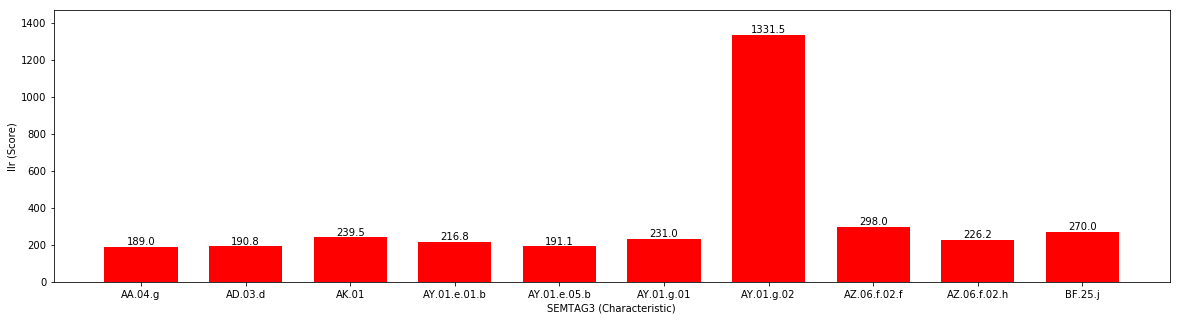

In [25]:
fdef_tags=my_comp.compute_surprises('fnonl',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1302410
149 significantly characterising terms
Number of characteristic tags is 149
(BC.07.b [Law-enforcement/peace-officer], 121.22645044794501) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(BB.03 [Control], 106.7051027720248) : [('of', 110), ('charge', 109), ('took', 73), ('led', 47), ('take', 35), ('leads', 25), ('leading', 19), ('lead', 16), ('hold', 11), ('direction', 8)]
(BB.12.d.01 [Instrument/place of torture], 97.49795967762898) : [('horse', 409), ('horses', 131), ('boots', 5), ('wheels', 1), ('wheel', 1), ('picket', 1), ('gridiron', 1)]
(BA.14.k.08.a [Officer/soldier of rank], 95.35990438429283) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(AK.02 [Creation], 89.96684826455936) : [('produce', 414), ('produced', 369), ('made', 339), ('produces', 244), ('make', 114), ('producing', 62), ('making', 33), ('up', 20), ('brought', 19), ('makes', 7)]
(AO.

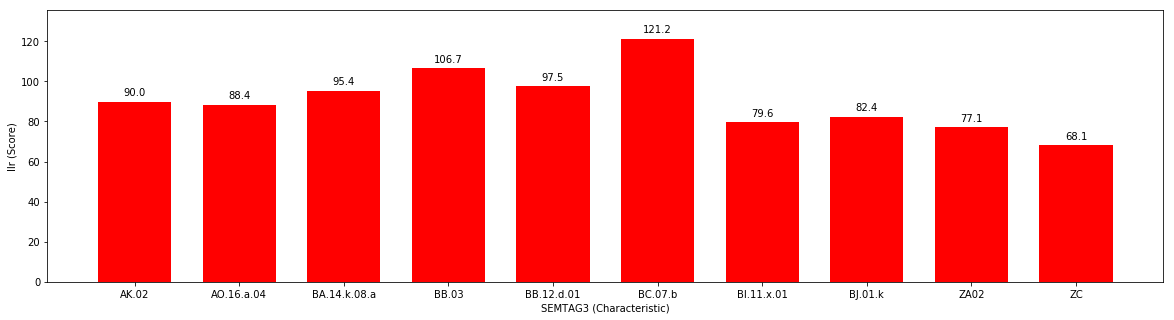

In [26]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)